*Linear regression creates an equation in which you input your given numbers (X) and it outputs the target variable that you want to find out (Y).*

# importing Libraries requuired

## commom ones first

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## using sklearn for some basic extra functionalities

In [3]:
from sklearn.model_selection import train_test_split
from sklearn import datasets

In [4]:
#from tqdm import tqdm # could be used but not well sure how to do in a better way will do in future.....................

# Defining Class

In [9]:
class LinearRegression:

    #initializing values in start
    def __init__(self,lear_rate=0.001,nf_iters=1000,tolerance=1e-6,patience=50,lr_decay_factor=0.9, decay_interval=100):
        self.lear_rate = lear_rate
        self.nf_iters = nf_iters
        self.weights = None
        self.bias = None
        self.mse_history = []  # Store MSE at each iteration for seeing the curve
        self.weights_history = []  # Store weight changes for plotting purposes
        self.tolerance = tolerance
        self.patience = patience
        self.lr_decay_factor = lr_decay_factor
        self.decay_interval = decay_interval

    ##initiated the gradient computation func
    def compute_gradients(self, X, y, y_pred):
        n_samples = X.shape[0]
        dw = (1/n_samples) * X.T @ (y_pred - y)
        db = (1/n_samples) * np.sum(y_pred - y)
        return dw, db

    # the main code stands here only
    def fit(self,X,y):

      #asserting or more in a layman way forcing to put data in only specific way needed ....
      assert X.shape[0] == y.shape[0], "Number of samples in X and y must match."
      assert X.ndim == 2, "X must be a 2D array."
      assert y.ndim == 1, "y must be a 1D array."


      n_samples,n_features = X.shape#getting the no. of samples and the no. of features from the data X which is supposed to be a matrix..

      self.weights = np.zeros(n_features)#set values to weight zero for now. we can do it to be random too but np.random.random((3, 3))
      self.bias = 0  #which is set to zero for now and will get updated as of now with the GD

      prev_mse = float('inf')
      patience_counter = 0


      #the final loop which determines the whole outcome
      for i in range(self.nf_iters):
        y_predicted = np.dot(X,self.weights) + self.bias# predicts the value by putting it in eq..
        dw,db=self.compute_gradients(X,y,y_predicted)

        #updating the weight and biases as of with GD
        self.weights = self.weights - self.lear_rate*dw
        self.bias = self.bias - self.lear_rate*db

        # Calculate MSE for current iteration
        mse = mean_squared_error(y, y_predicted)

        self.mse_history.append(mse)##storing for future plots
        #making a history for weights
        self.weights_history.append(self.weights.copy())

        #early stopping if the mse is changing very slow
        if abs(prev_mse - mse) < self.tolerance:
          patience_counter += 1
        else:
          patience_counter = 0

        if patience_counter >= self.patience:
          print(f"Early stopping at iteration {i+1}")
          break

        if (i + 1) % self.decay_interval == 0:
                self.lear_rate *= self.lr_decay_factor
        prev_mse = mse

    #for predicting on after the fit is called so the weights and biases got updated for better predictions....
    def predict(self,X):
      y_aprox_pred = np.dot(X,self.weights) + self.bias
      return y_aprox_pred

# Evaluating func

In [10]:
##without evaluation nothing really matters right {{{{{{{::---:::}}}}}}}
def mean_squared_error(y_true,y_pred):
  ##find squares of the errors and then find mean of all of them.....
  return np.mean((y_true-y_pred)**2)

# Dataset part

In [11]:
##for running let's get some fake data .......
##or just use some sklearn extrasss...
X,y=datasets.make_regression(n_samples=100,n_features=1,noise=15,random_state=42)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Fitting & Using the model

In [12]:
###first gotta put it up .... take it up to the lime light ......???......!!
ln_rg=LinearRegression(lear_rate=0.01,nf_iters=1000)
ln_rg.fit(X_train,y_train)

In [13]:
##now time for using ln_rg for the predictions
pred=ln_rg.predict(X_test)

# evaluation(MSE)

In [14]:
mse=mean_squared_error(y_test,pred)
print(mse)

236.470710327948


# have some graph now

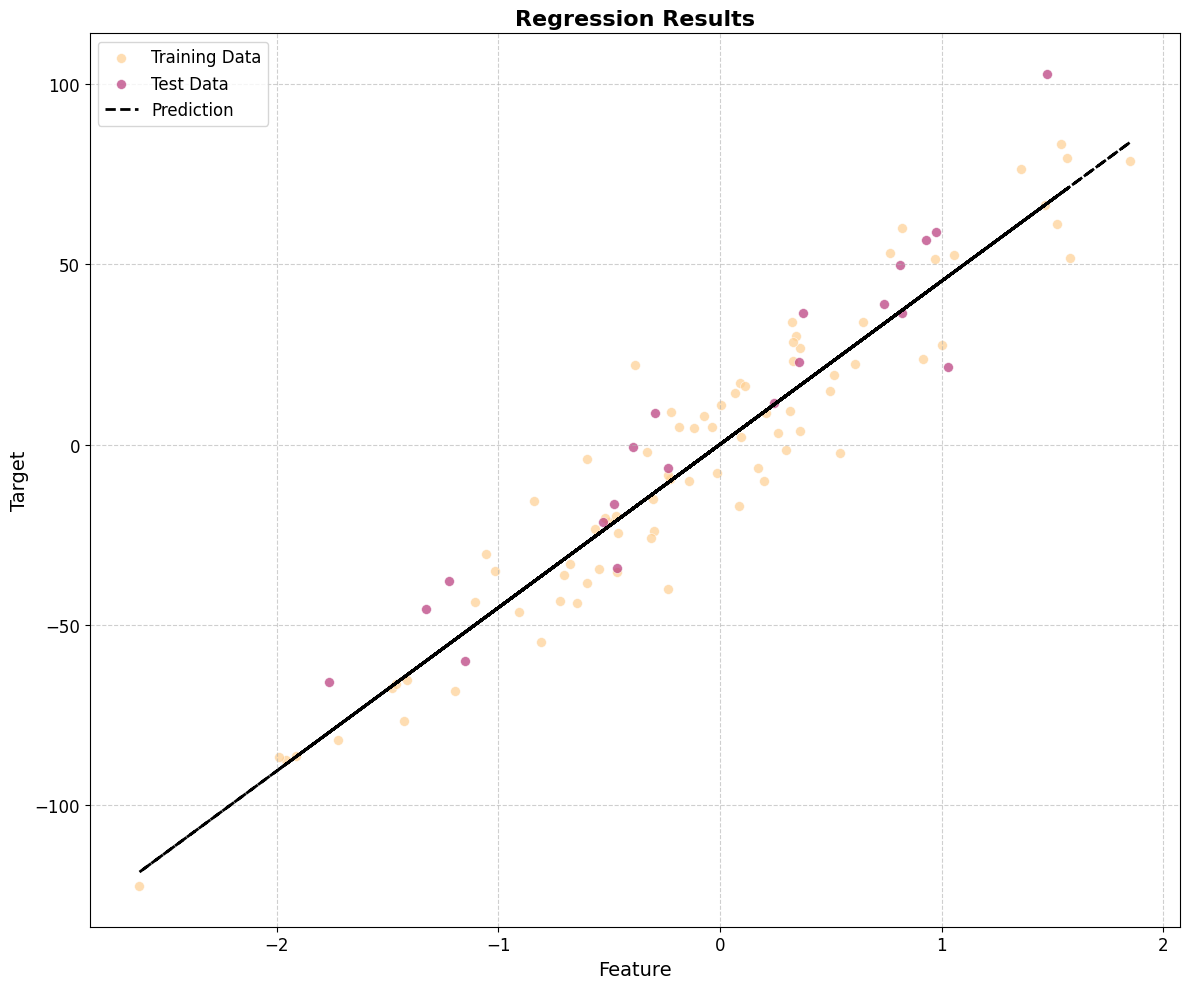

In [15]:
# Get the colormap
cmap = plt.get_cmap('magma')
fig = plt.figure(figsize=(12, 10))

# training data...
m1 = plt.scatter(X_train, y_train, color=cmap(0.9), s=50, alpha=0.7, label='Training Data', edgecolors='w', linewidth=0.5)
# test data
m2 = plt.scatter(X_test, y_test, color=cmap(0.5), s=50, alpha=0.7, label='Test Data', edgecolors='w', linewidth=0.5)

# Plot the regression line
plt.plot(X, ln_rg.predict(X), color='black', linewidth=2, label='Prediction', linestyle='--')

# Add gridlines for better reading
plt.grid(True, linestyle='--', alpha=0.6)


plt.title('Regression Results', fontsize=16, fontweight='bold')
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Target', fontsize=14)
plt.legend(loc='upper left', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


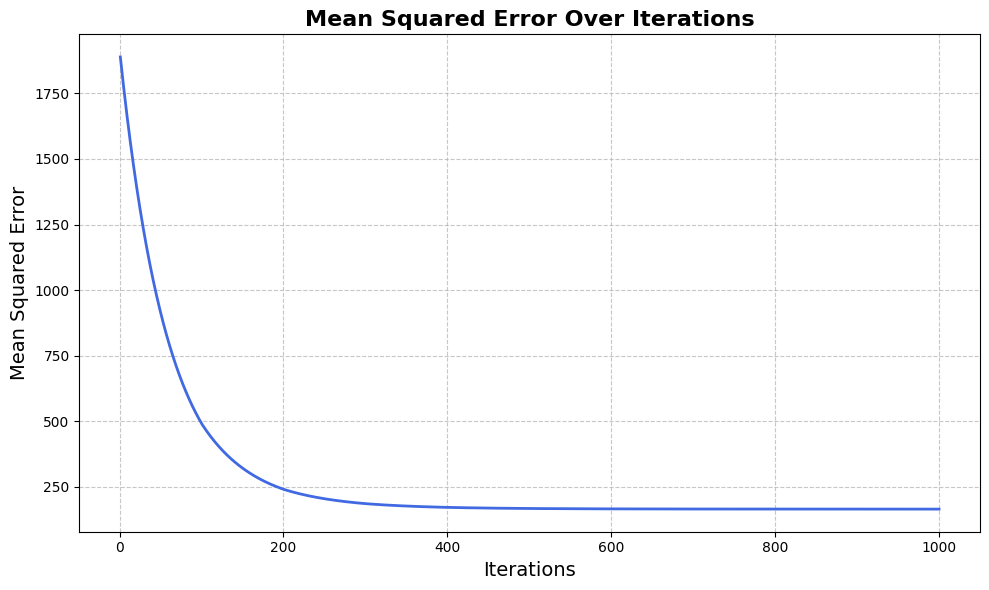

In [16]:
plt.figure(figsize=(10, 6))

# Plots per iteration now
plt.plot(range(1, ln_rg.nf_iters + 1), ln_rg.mse_history, color='royalblue', linewidth=2)

plt.title('Mean Squared Error Over Iterations', fontsize=16, fontweight='bold')
plt.xlabel('Iterations', fontsize=14)
plt.ylabel('Mean Squared Error', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Early stopping at iteration 59


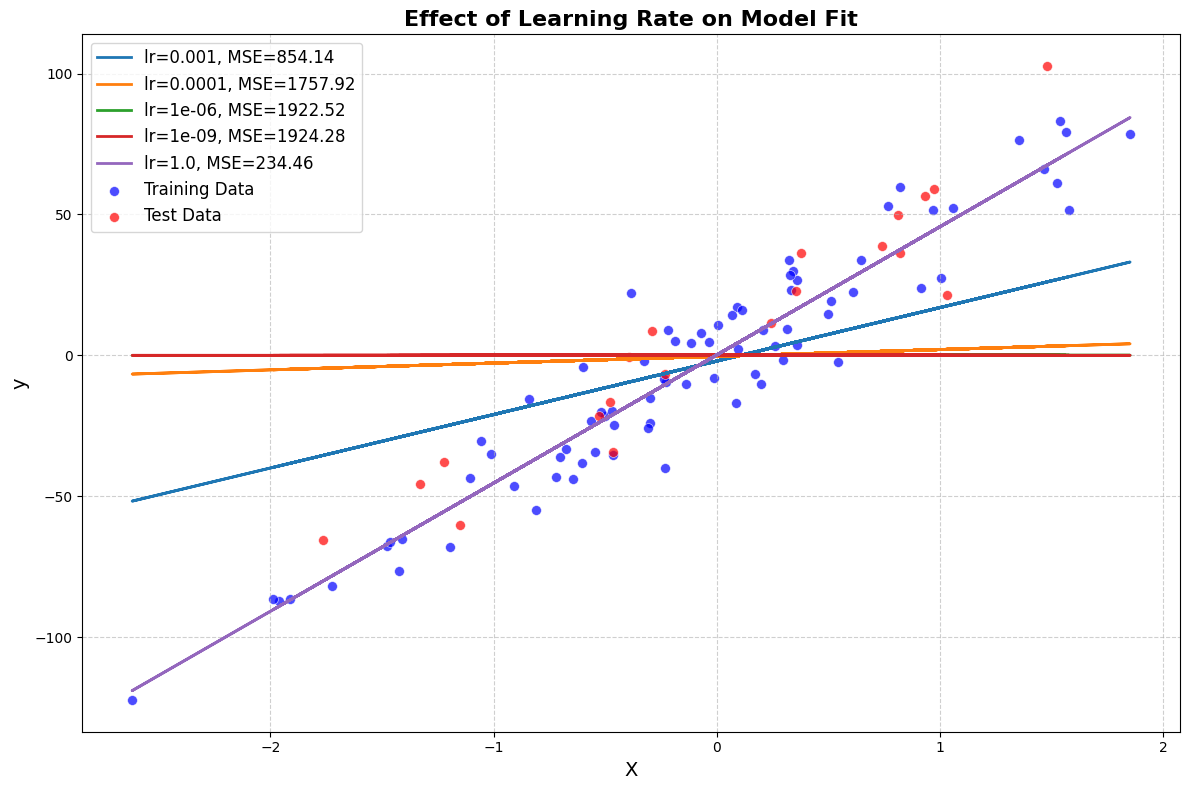

In [17]:
learning_rates = [0.001,0.0001,  0.000001, 0.000000001, 1.0]

plt.figure(figsize=(12, 8))

for rate in learning_rates:
    model = LinearRegression(lear_rate=rate, nf_iters=1000)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test, pred)

    #plotting for each fit of learning rate
    plt.plot(X, model.predict(X), label=f'lr={rate}, MSE={mse:.2f}', linewidth=2)

# Scatter plot for training and test data
plt.scatter(X_train, y_train, color='blue', label='Training Data', s=50, alpha=0.7, edgecolors='w', linewidth=0.5)
plt.scatter(X_test, y_test, color='red', label='Test Data', s=50, alpha=0.7, edgecolors='w', linewidth=0.5)
#rest of fillers...
plt.grid(True, linestyle='--', alpha=0.6)
plt.title('Effect of Learning Rate on Model Fit', fontsize=16, fontweight='bold')
plt.xlabel('X', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.legend(loc='best', fontsize=12)
plt.tight_layout()
plt.show()

In [18]:
weights_history = np.array(ln_rg.weights_history)
weights_history.shape

(1000, 1)

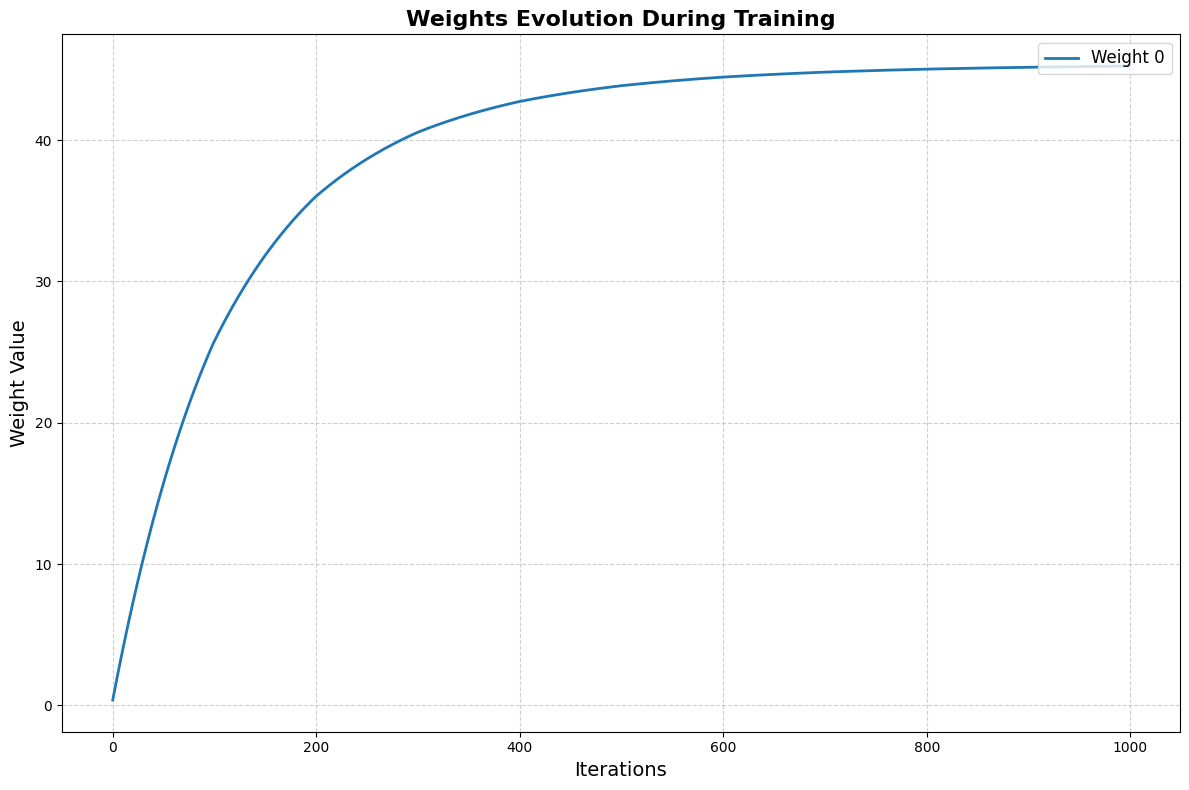

In [19]:
plt.figure(figsize=(12, 8))

for i in range(weights_history.shape[1]):
    plt.plot(weights_history[:, i], label=f'Weight {i}', linewidth=2)

plt.title('Weights Evolution During Training', fontsize=16, fontweight='bold')
plt.xlabel('Iterations', fontsize=14)
plt.ylabel('Weight Value', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc='upper right', fontsize=12)
plt.tight_layout()
plt.show()


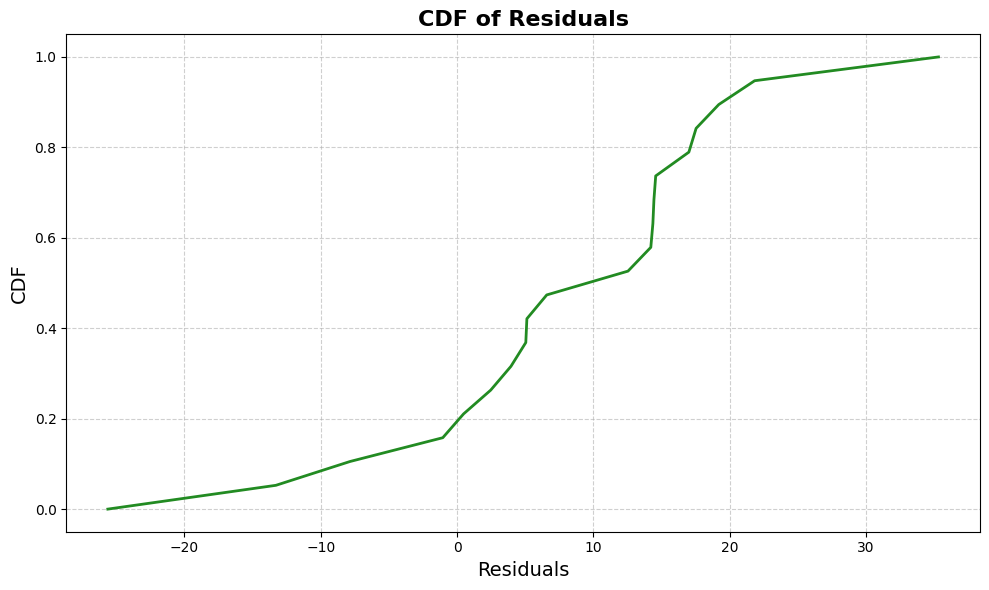

In [20]:
residuals = y_test - pred
sorted_residuals = np.sort(residuals)
cdf = np.linspace(0, 1, len(residuals))

plt.figure(figsize=(10, 6))


plt.plot(sorted_residuals, cdf, color='forestgreen', linewidth=2)
plt.title('CDF of Residuals', fontsize=16, fontweight='bold')
plt.xlabel('Residuals', fontsize=14)
plt.ylabel('CDF', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
